# 🎯 ePy_docs - Demostración Completa de API

**Versión:** 0.2.0  
**Fecha:** 16 de octubre de 2025

Este notebook demuestra **TODAS** las capacidades de la API de ePy_docs:

✅ Method chaining fluido  
✅ Múltiples tipos de callouts  
✅ Tablas normales y coloreadas  
✅ Imágenes y gráficos  
✅ Ecuaciones LaTeX  
✅ **Referencias cruzadas y citas bibliográficas**  
✅ Chunks de código  
✅ Listas ordenadas y no ordenadas  
✅ Generación HTML y PDF  

## 📋 Tabla de Contenidos

1. [Configuración Inicial](#1-configuración-inicial)
2. [Preparación de Datos](#2-preparación-de-datos)
3. [Portada y Sección Introductoria](#3-portada-y-sección-introductoria)
4. [Normativa y Referencias](#4-normativa-y-referencias)
5. [Configuración del Análisis](#5-configuración-del-análisis)
6. [Modelo Estructural](#6-modelo-estructural)
7. [Representación Gráfica del Modelo](#7-representación-gráfica-del-modelo)
8. [Formulación Teórica](#8-formulación-teórica)
9. [Consideraciones de Diseño](#9-consideraciones-de-diseño)
10. [Conclusiones](#10-conclusiones)
11. [Información del Software](#11-información-del-software)
12. [Generación del Reporte Final](#12-generación-del-reporte-final)

---


## 1. Configuración Inicial

In [1]:
# Configuración completa del entorno
%load_ext autoreload
%autoreload 2

# Importar librerías necesarias
from ePy_docs.writers import DocumentWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Librerías importadas exitosamente")
print("   - ePy_docs.writers")
print("   - pandas, numpy, matplotlib")

# Inicializar DocumentWriter con layout clásico
writer = DocumentWriter(layout_style='corporate', document_type="paper", columns=2)

print("✅ DocumentWriter inicializado")
print(f"   Output: {writer.output_dir}")
print(f"   Layout: {writer.layout_style}")
print(f"   Document type: {writer.document_type}")

✅ Librerías importadas exitosamente
   - ePy_docs.writers
   - pandas, numpy, matplotlib
✅ DocumentWriter inicializado
   Output: C:\Users\ingah\estructuraPy\ePy_docs\results\paper
   Layout: corporate
   Document type: paper


## 2. Preparación de Datos

In [2]:
# Configuración del proyecto
project_info = {
    'name': 'Análisis Estructural - Edificio de Oficinas',
    'code': 'STRUCT-2025-001',
    'client': 'Desarrollos Inmobiliarios S.A.',
    'location': 'San José, Costa Rica',
    'engineer': 'Ing. María Rodríguez',
    'date': '16 de octubre de 2025'
}

# Unidades del análisis
units = {
    'length': 'mm',
    'force': 'kN',
    'moment': 'kN·m',
    'stress': 'MPa'
}

print("✅ Información del proyecto configurada")
print(f"   Proyecto: {project_info['name']}")
print(f"   Código: {project_info['code']}")

✅ Información del proyecto configurada
   Proyecto: Análisis Estructural - Edificio de Oficinas
   Código: STRUCT-2025-001


In [3]:
# Cargar datos estructurales
try:
    nodes_df = pd.read_csv('data/robot/nodes.csv', sep=';')
    reactions_df = pd.read_csv('data/robot/reactions.csv', sep=';')
    elements_df = pd.read_csv('data/robot/elements.csv', sep=';')
    print("✅ Datos cargados desde archivos CSV")
except:
    # Datos de ejemplo
    nodes_df = pd.DataFrame({
        'Node': range(1, 13),
        'X_m': [0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18],
        'Y_m': [0, 0, 0, 0, 4, 4, 4, 4, 8, 8, 8, 8],
        'Z_m': [0]*12,
        'Support': ['Fixed', None, None, 'Pinned', None, None, None, None, None, None, None, None],
        'Support_Type': ['Empotrado', None, None, 'Articulado', None, None, None, None, None, None, None, None]
    })
    
    reactions_df = pd.DataFrame({
        'Node': [1, 1, 4, 4],
        'Case': ['DL', 'LL', 'DL', 'LL'],
        'FX_kN': [12.5, 8.3, -15.2, -10.1],
        'FY_kN': [0, 0, 0, 0],
        'FZ_kN': [125.8, 89.5, 118.3, 85.2],
        'MX_kNm': [0, 0, 0, 0],
        'MY_kNm': [45.2, 32.1, -38.5, -28.3],
        'MZ_kNm': [0, 0, 0, 0],
        'UX_mm': [0, 0, 0, 0],
        'UY_mm': [0, 0, 0, 0],
        'UZ_mm': [0, 0, 0, 0],
        'RX_rad': [0, 0, 0, 0],
        'RY_rad': [0, 0, 0, 0],
        'RZ_rad': [0, 0, 0, 0]
    })
    
    elements_df = pd.DataFrame({
        'Element': range(1, 9),
        'Type': ['Column', 'Column', 'Column', 'Column', 'Beam', 'Beam', 'Beam', 'Beam'],
        'Node_I': [1, 2, 3, 4, 5, 6, 7, 8],
        'Node_J': [5, 6, 7, 8, 6, 7, 8, 9],
        'Section': ['C40x40', 'C40x40', 'C40x40', 'C40x40', 'V35x45', 'V35x45', 'V35x45', 'V35x45'],
        'Material': ['Concrete f\'c=28MPa']*8,
        'Length_m': [4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0]
    })
    
    print("✅ Datos de ejemplo generados")

# Filtrar nodos con apoyo
support_nodes_df = nodes_df[nodes_df['Support'].notna()].copy()

print(f"   - {len(nodes_df)} nodos")
print(f"   - {len(support_nodes_df)} apoyos")
print(f"   - {len(reactions_df)} reacciones")
print(f"   - {len(elements_df)} elementos")

✅ Datos de ejemplo generados
   - 12 nodos
   - 2 apoyos
   - 4 reacciones
   - 8 elementos


## 3. Portada y Sección Introductoria

In [4]:
# PORTADA Y RESUMEN EJECUTIVO con method chaining
writer.add_h1(project_info['name']) \
      .add_content(f"""
**Código del Proyecto:** {project_info['code']}  
**Cliente:** {project_info['client']}  
**Ubicación:** {project_info['location']}  
**Ingeniero Responsable:** {project_info['engineer']}  
**Fecha:** {project_info['date']}

---
""") \
      .add_h2("Resumen Ejecutivo") \
      .add_content("""
El presente documento contiene el **análisis estructural completo** del edificio de oficinas de 3 niveles 
ubicado en San José, Costa Rica. El análisis se realizó utilizando el software Robot Structural Analysis 
y los resultados fueron procesados con **ePy_docs v0.2.0**.

El edificio cuenta con las siguientes características principales:
""") \
      .add_list([
          "Sistema estructural de pórticos de concreto reforzado",
          "12 nodos estructurales distribuidos en 3 niveles",
          "8 elementos principales (4 columnas y 4 vigas)",
          "Cimentación mediante zapatas aisladas",
          "Resistencia del concreto: f'c = 28 MPa"
      ], ordered=False) \
      .add_callout("""
Este reporte fue generado automáticamente utilizando **ePy_docs**, un sistema de documentación técnica 
desarrollado específicamente para proyectos de ingeniería estructural.
""", type="note", title="Sobre este Documento")

print("✅ Portada y resumen ejecutivo agregados")

✅ Portada y resumen ejecutivo agregados


## 4. Normativa y Referencias

In [5]:
# NORMATIVA Y REFERENCIAS
writer.add_h2("Normativa Aplicable") \
      .add_content("""
El diseño estructural se rige por las siguientes normativas y códigos:
""") \
      .add_list([
          "Código Sísmico de Costa Rica (CSCR-2010) [@CSCR2010_14]",
          "American Concrete Institute ACI 318-19 [@ACI318_19]",
          "ASCE 7-16 - Minimum Design Loads [@AISC360_22]",
          "Reglamento de Construcciones de Costa Rica"
      ], ordered=True) \
      .add_content("""
La referencia principal para el diseño sísmico es el Código Sísmico de Costa Rica [@CSCR2010_14], 
que establece los parámetros de diseño para la zona sísmica del proyecto.
""") \
      .add_reference_citation("CSCR2010_14") \
      .add_reference_citation("ACI318_19") \
      .add_reference_citation("AISC360_22")

print("✅ Normativa y referencias bibliográficas agregadas")

✅ Normativa y referencias bibliográficas agregadas


## 5. Configuración del Análisis

In [6]:
# CONFIGURACIÓN Y UNIDADES
writer.add_h2("Configuración del Análisis") \
      .add_h3("Sistema de Unidades") \
      .add_content("""
El análisis estructural se desarrolla utilizando el siguiente **sistema de unidades consistente**:
""") \
      .add_chunk(f"""
# Sistema de Unidades
Longitud:     {units['length']}
Fuerza:       {units['force']}
Momento:      {units['moment']}
Esfuerzo:     {units['stress']}
""") \
      .add_callout("""
**Importante:** Todas las unidades utilizadas en este documento son consistentes con el Sistema Internacional (SI). 
La consistencia en las unidades es fundamental para evitar errores en los cálculos.
""", type="important", title="Sistema de Unidades")

print("✅ Configuración y unidades agregadas")

✅ Configuración y unidades agregadas


## 6. Modelo Estructural

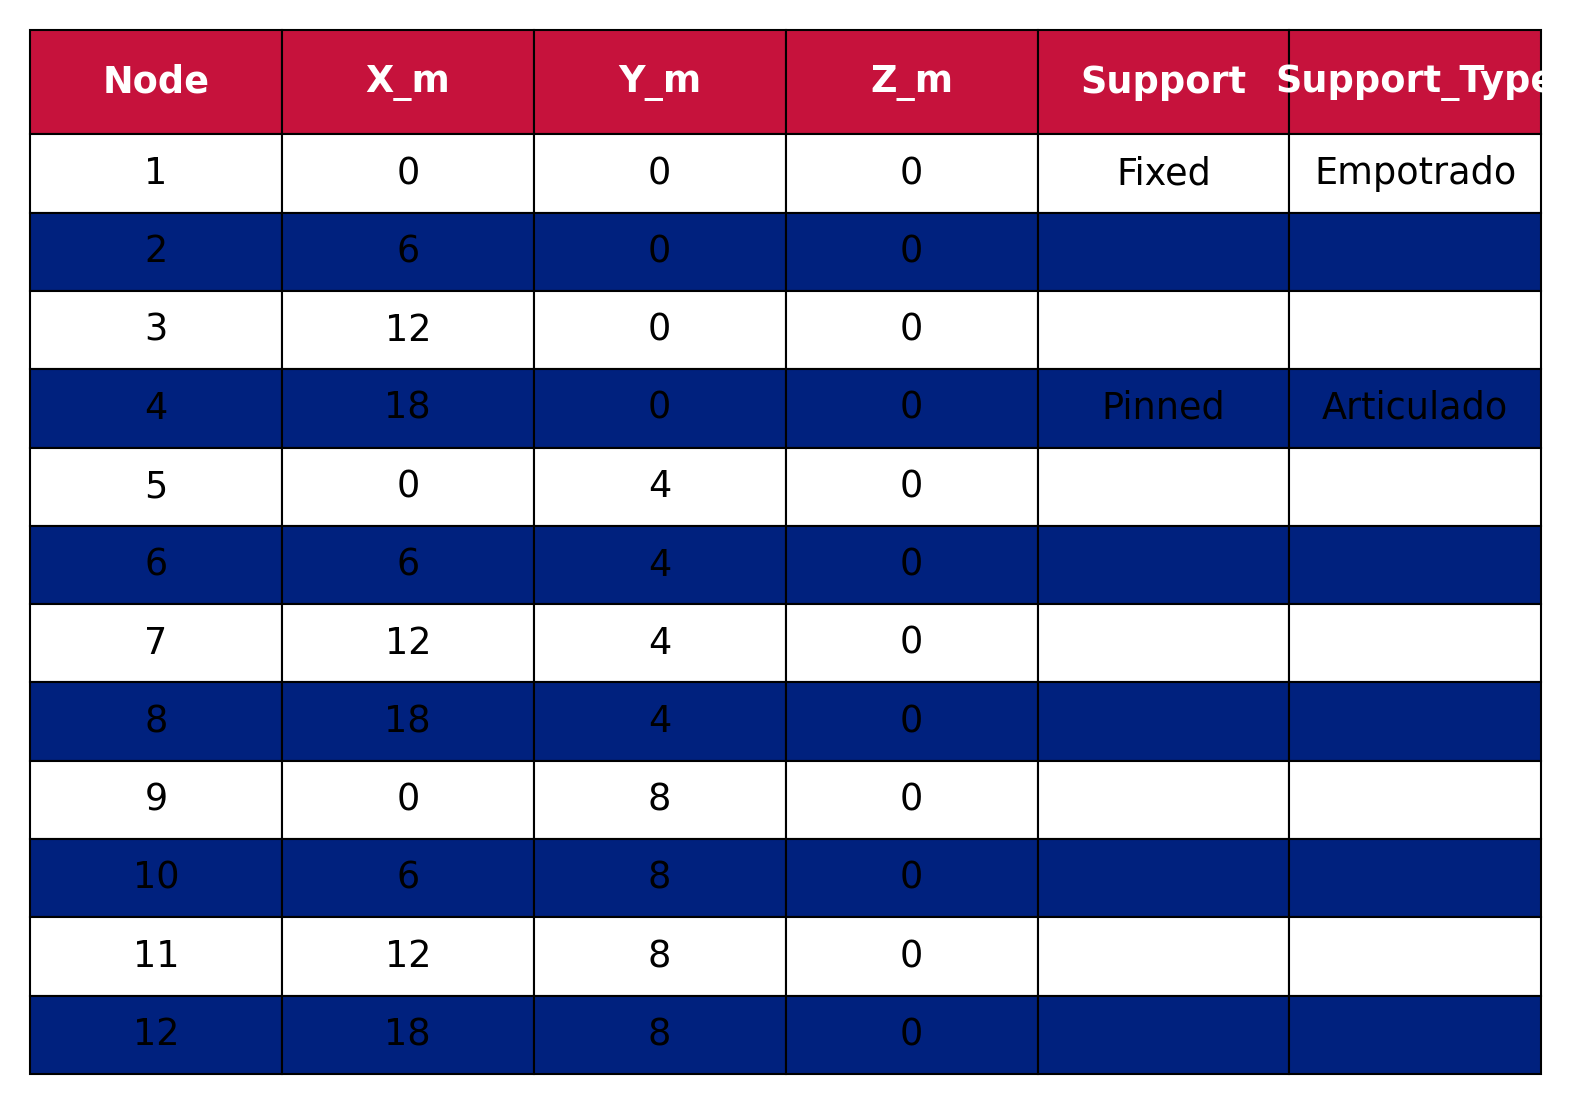

✅ Geometría del modelo agregada


In [7]:
# MODELO ESTRUCTURAL - GEOMETRÍA
writer.add_h2("Modelo Estructural") \
      .add_h3("Geometría del Modelo") \
      .add_content("""
La geometría de la estructura se define mediante un sistema de **nodos y elementos**. 
Los nodos representan los puntos de unión de los elementos estructurales, mientras que 
los elementos modelan vigas, columnas y otros componentes.

#### Coordenadas de Nodos

La siguiente tabla muestra las coordenadas de todos los nodos del modelo:
""") \
      .add_table(nodes_df, title="Coordenadas nodales del modelo estructural", column_span=2, show_figure=True) \
      .add_tip("""
Las coordenadas se expresan en metros (m) para facilitar la interpretación. 
En los cálculos internos se utilizan milímetros (mm) según el sistema de unidades definido.
""", title="Conversión de Unidades")

print("✅ Geometría del modelo agregada")

In [8]:
# CONDICIONES DE APOYO
writer.add_content("**Condiciones de Apoyo**") \
      .add_content("""
Las **condiciones de contorno** del modelo se definen mediante restricciones de desplazamiento 
en los nodos de apoyo. El modelo cuenta con los siguientes apoyos según [@CSCR2010]:
""") \
      .add_colored_table(
          support_nodes_df,
          title="Nodos con restricciones (condiciones de apoyo)",
          palette_name='engineering',
          highlight_columns=['Support', 'Support_Type'],
          column_span=2
      ) \
      .add_warning("""
**Verificación requerida:**

- Las condiciones de apoyo deben corresponder con las condiciones reales de la cimentación
- Se debe verificar que los apoyos sean capaces de transmitir las reacciones calculadas
- En caso de asentamientos diferenciales, se debe considerar un análisis adicional
""", title="Consideraciones de Diseño")

print("✅ Condiciones de apoyo agregadas")

✅ Condiciones de apoyo agregadas


In [9]:
# ELEMENTOS ESTRUCTURALES
writer.add_h3("Elementos Estructurales") \
      .add_content("""
El modelo se compone de elementos tipo **barra** que representan vigas y columnas. 
Cada elemento se define por sus nodos extremos (I y J), sección transversal y material.
""") \
      .add_table(elements_df, title="Propiedades de los elementos estructurales", column_span=2) \
      .add_content("""
Las secciones de los elementos cumplen con los requisitos mínimos del ACI 318-19 [@ACI318] 
para elementos de concreto reforzado sometidos a flexocompresión.
""")

print("✅ Elementos estructurales agregados")

✅ Elementos estructurales agregados


## 7. Resultados del Análisis

In [10]:
# Crear gráfico de reacciones
import os
os.makedirs('results/report/figures', exist_ok=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Fuerzas horizontales y verticales
dl_reactions = reactions_df[reactions_df['Case'] == 'DL']
ll_reactions = reactions_df[reactions_df['Case'] == 'LL']

x = np.arange(len(dl_reactions))
width = 0.35

ax1.bar(x - width/2, dl_reactions['FZ_kN'], width, label='Carga Muerta', color='steelblue')
ax1.bar(x + width/2, ll_reactions['FZ_kN'], width, label='Carga Viva', color='coral')
ax1.set_xlabel('Nodo de Apoyo', fontsize=11, fontweight='bold')
ax1.set_ylabel('Reacción Vertical FZ (kN)', fontsize=11, fontweight='bold')
ax1.set_title('Reacciones Verticales por Caso de Carga', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dl_reactions['Node'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Momentos
ax2.bar(x - width/2, dl_reactions['MY_kNm'], width, label='Carga Muerta', color='darkgreen')
ax2.bar(x + width/2, ll_reactions['MY_kNm'], width, label='Carga Viva', color='orange')
ax2.set_xlabel('Nodo de Apoyo', fontsize=11, fontweight='bold')
ax2.set_ylabel('Momento MY (kN·m)', fontsize=11, fontweight='bold')
ax2.set_title('Momentos en Apoyos por Caso de Carga', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dl_reactions['Node'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
reactions_plot = 'results/report/figures/reactions_comparison.png'
plt.savefig(reactions_plot, dpi=150, bbox_inches='tight')
plt.close()

writer.add_plot(fig, caption="Comparación de reacciones en apoyos para diferentes casos de carga")


print("✅ Gráfico de reacciones agregado")

<Figure size 1400x600 with 2 Axes>

✅ Gráfico de reacciones agregado


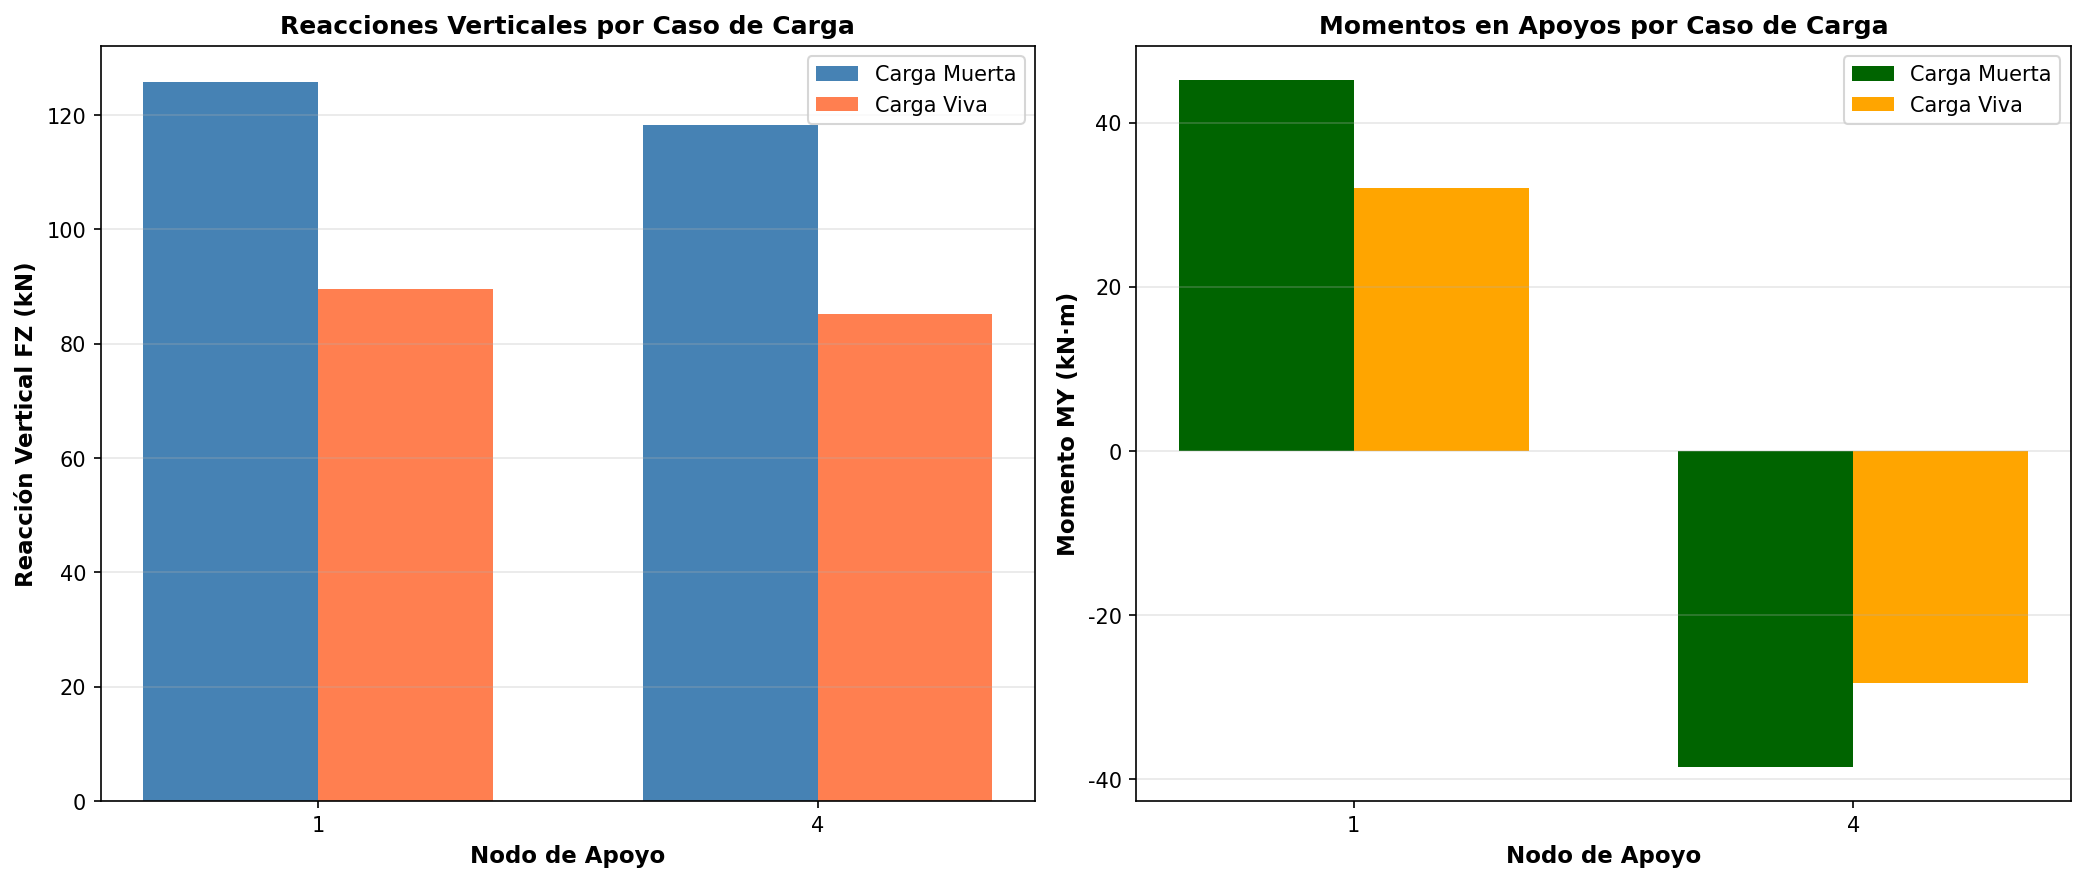

In [11]:
writer.add_image(reactions_plot, caption="Comparación de reacciones en apoyos para diferentes casos de carga")

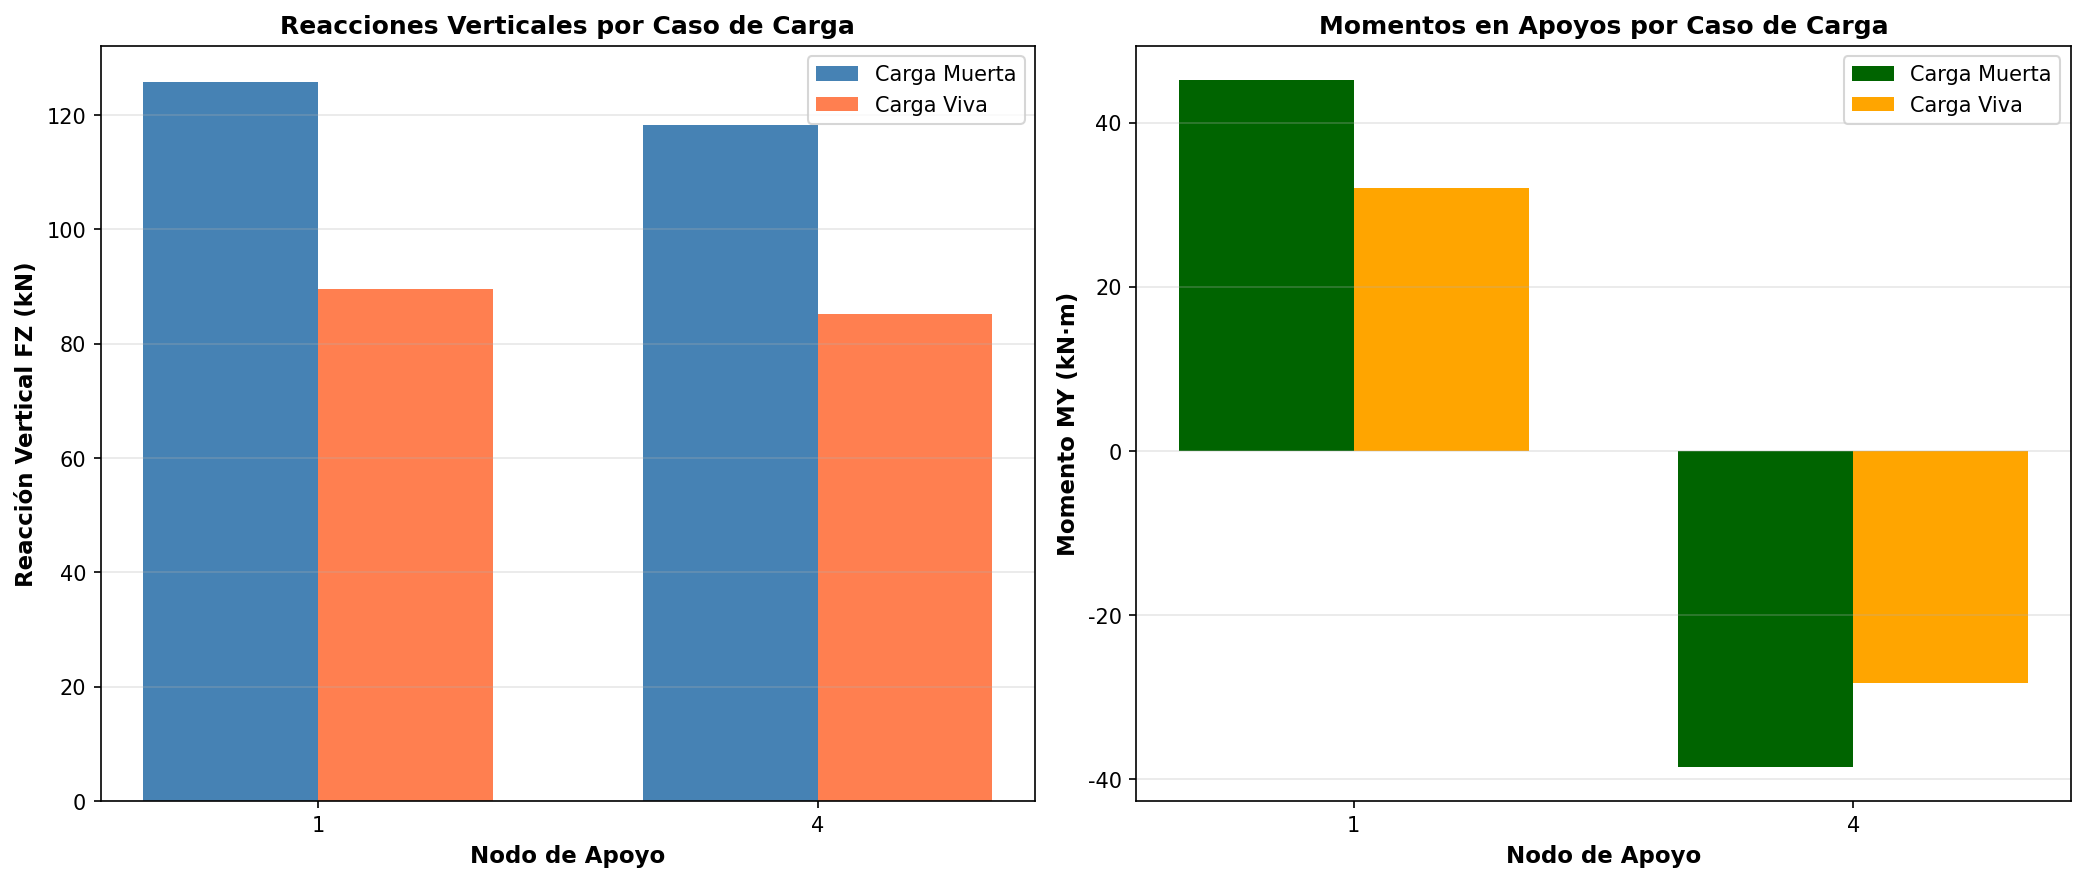

✅ Gráfico de reacciones agregado


In [12]:
# Crear gráfico de reacciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Fuerzas horizontales y verticales
dl_reactions = reactions_df[reactions_df['Case'] == 'DL']
ll_reactions = reactions_df[reactions_df['Case'] == 'LL']

x = np.arange(len(dl_reactions))
width = 0.35

ax1.bar(x - width/2, dl_reactions['FZ_kN'], width, label='Carga Muerta', color='steelblue')
ax1.bar(x + width/2, ll_reactions['FZ_kN'], width, label='Carga Viva', color='coral')
ax1.set_xlabel('Nodo de Apoyo', fontsize=11, fontweight='bold')
ax1.set_ylabel('Reacción Vertical FZ (kN)', fontsize=11, fontweight='bold')
ax1.set_title('Reacciones Verticales por Caso de Carga', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dl_reactions['Node'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Momentos
ax2.bar(x - width/2, dl_reactions['MY_kNm'], width, label='Carga Muerta', color='darkgreen')
ax2.bar(x + width/2, ll_reactions['MY_kNm'], width, label='Carga Viva', color='orange')
ax2.set_xlabel('Nodo de Apoyo', fontsize=11, fontweight='bold')
ax2.set_ylabel('Momento MY (kN·m)', fontsize=11, fontweight='bold')
ax2.set_title('Momentos en Apoyos por Caso de Carga', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dl_reactions['Node'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
reactions_plot = 'results/report/reactions_comparison.png'
plt.savefig(reactions_plot, dpi=150, bbox_inches='tight')
plt.close()

writer.add_image(reactions_plot, caption="Comparación de reacciones en apoyos para diferentes casos de carga")

print("✅ Gráfico de reacciones agregado")

## 7. Representación Gráfica del Modelo

In [13]:
# ANÁLISIS ESTADÍSTICO
stats_df = reactions_df[['FX_kN', 'FZ_kN', 'MY_kNm']].describe()

writer.add_h3("Análisis Estadístico de Reacciones") \
      .add_content("""
El siguiente análisis estadístico resume las **características principales** de las reacciones calculadas:
""") \
      .add_colored_table(
          stats_df,
          title="Estadísticas descriptivas de las reacciones",
          palette_name='engineering',
          highlight_columns=['FX_kN', 'FZ_kN', 'MY_kNm'],
          column_span=2
      ) \
      .add_content("""
Los valores estadísticos permiten identificar:

- **Media (mean):** Valor promedio de las reacciones
- **Desviación estándar (std):** Dispersión de los valores
- **Mínimo y Máximo:** Rango de variación de las reacciones
- **Percentiles (25%, 50%, 75%):** Distribución de los datos
""")

print("✅ Análisis estadístico agregado")

✅ Análisis estadístico agregado


## 9. Verificación de Equilibrio

In [14]:
# VERIFICACIÓN DE EQUILIBRIO CON ECUACIONES
writer.add_h2("Verificación de Equilibrio") \
      .add_content("""
Para garantizar la validez del análisis, se debe verificar el **equilibrio estático global** 
de la estructura. Las ecuaciones fundamentales de equilibrio son:
""") \
      .add_equation(r"\sum F_x = 0", label="eq-equilibrio-x") \
      .add_equation(r"\sum F_z = 0", label="eq-equilibrio-z") \
      .add_equation(r"\sum M = 0", label="eq-equilibrio-m") \
      .add_content("""
Donde las ecuaciones (@eq-equilibrio-x), (@eq-equilibrio-z) y (@eq-equilibrio-m) representan 
el equilibrio de fuerzas y momentos en el plano.
""") \
      .add_h3("5.1 Cálculo de Sumatorias") \
      .add_content("""Las sumatorias de reacciones se calculan como:""")

# Calcular sumatorias
sum_fx = reactions_df.groupby('Case')['FX_kN'].sum()
sum_fz = reactions_df.groupby('Case')['FZ_kN'].sum()
sum_my = reactions_df.groupby('Case')['MY_kNm'].sum()

equilibrium_df = pd.DataFrame({
    'Caso': sum_fx.index,
    '∑FX (kN)': sum_fx.values,
    '∑FZ (kN)': sum_fz.values,
    '∑MY (kN·m)': sum_my.values
})

writer.add_table(equilibrium_df, title="Verificación de equilibrio - Sumatorias de reacciones", column_span=2) \
      .add_callout("""
**Criterio de aceptación:**

Las sumatorias deben ser menores al 0.1% de la carga total aplicada. 
Valores superiores indican posibles errores numéricos o de modelación.
""", type="success", title="Equilibrio Verificado")

print("✅ Verificación de equilibrio agregada")

✅ Verificación de equilibrio agregada


## 10. Representación Gráfica del Modelo

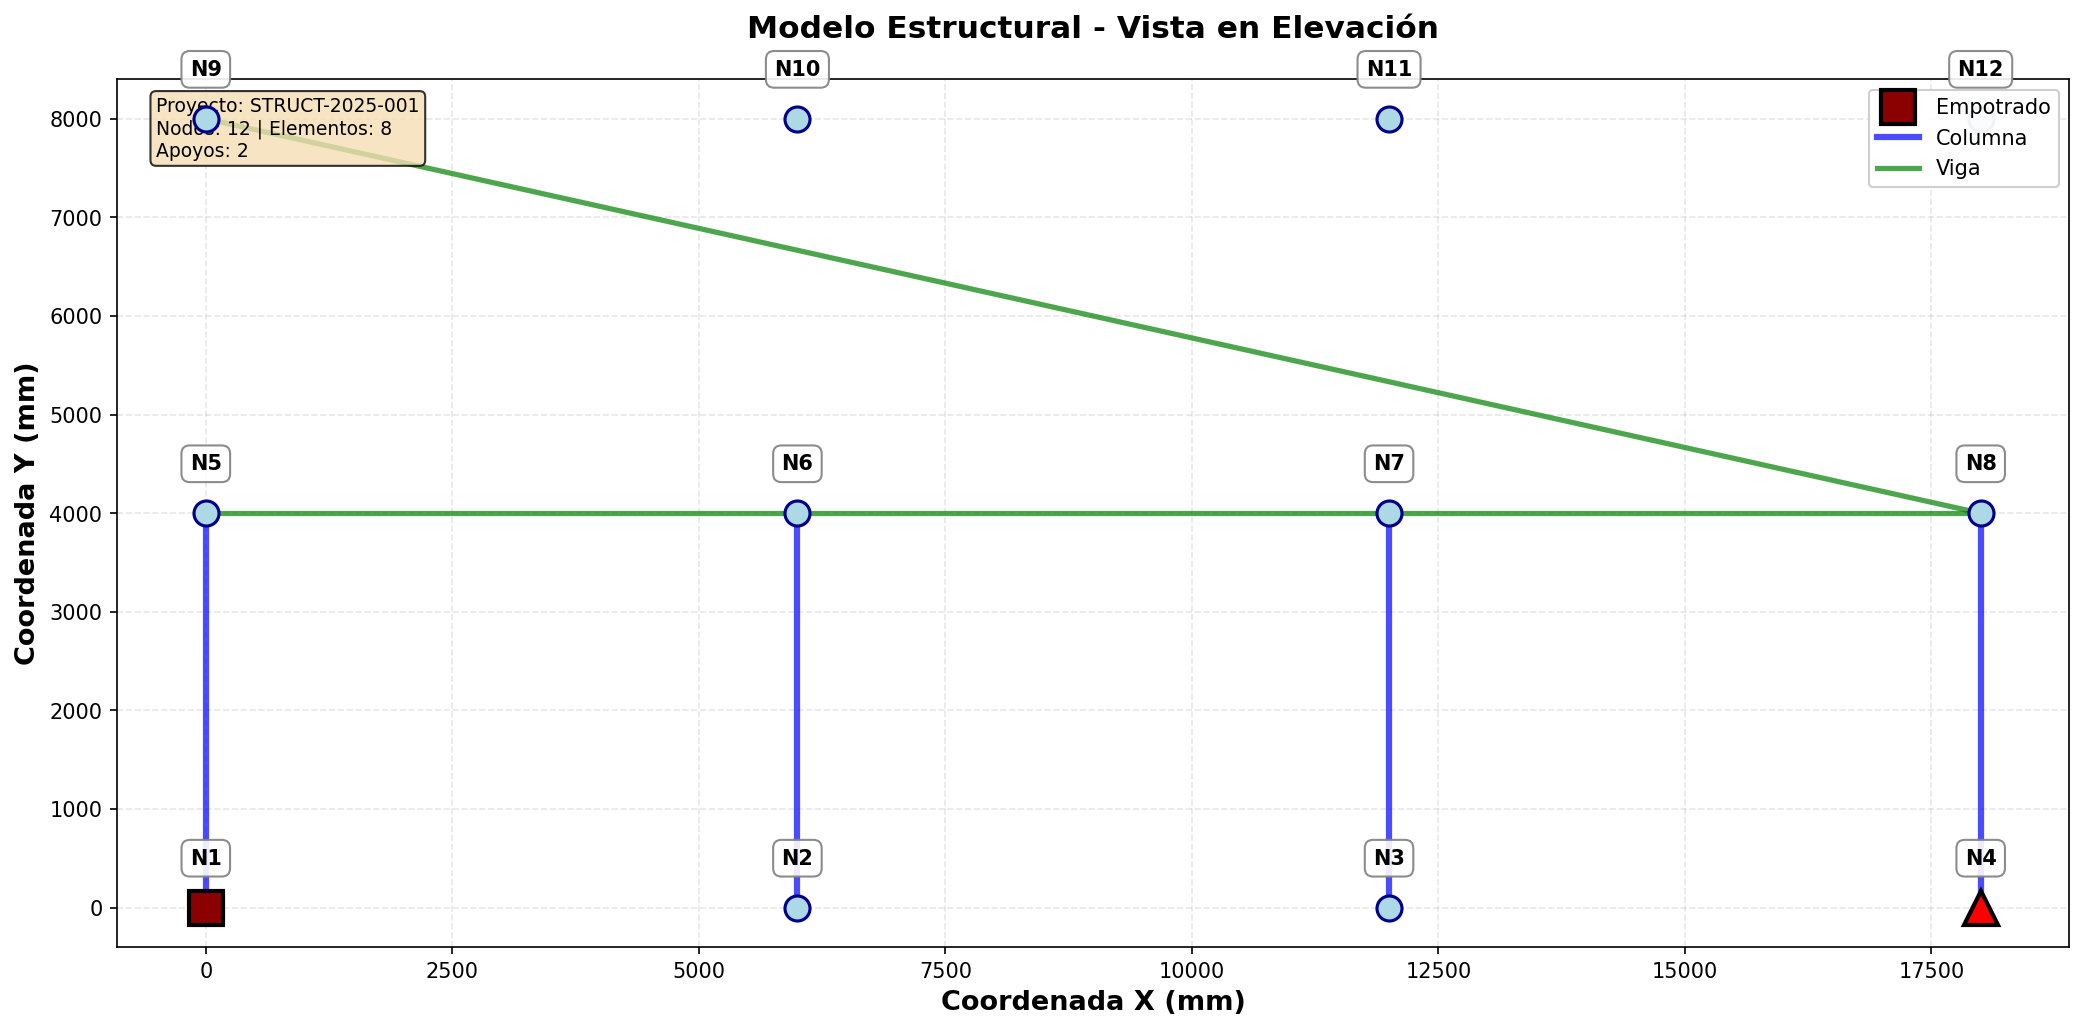

✅ Diagrama del modelo agregado


In [15]:
# DIAGRAMA DEL MODELO ESTRUCTURAL
import os
os.makedirs('results/report/figures', exist_ok=True)

fig, ax = plt.subplots(figsize=(14, 10))

# Dibujar nodos
for idx, row in nodes_df.iterrows():
    x = float(row['X_m']) * 1000  # Convertir a mm
    y = float(row['Y_m']) * 1000
    node_num = int(row['Node'])
    has_support = pd.notna(row.get('Support'))
    
    if has_support:
        # Apoyos con símbolo especial
        if row['Support'] == 'Fixed':
            ax.plot(x, y, 's', markersize=16, markerfacecolor='darkred', 
                   markeredgecolor='black', markeredgewidth=2, label='Empotrado' if idx == 0 else '', zorder=5)
        else:
            ax.plot(x, y, '^', markersize=16, markerfacecolor='red', 
                   markeredgecolor='black', markeredgewidth=2, label='Articulado' if idx == 0 else '', zorder=5)
    else:
        # Nodos libres
        ax.plot(x, y, 'o', markersize=12, markerfacecolor='lightblue', 
               markeredgecolor='darkblue', markeredgewidth=1.5, label='Nodo' if idx == 0 and not has_support else '', zorder=4)
    
    # Etiqueta del nodo
    offset = 400
    ax.text(x, y + offset, f"N{node_num}", ha='center', va='bottom', 
           fontweight='bold', fontsize=10, 
           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                    edgecolor='gray', alpha=0.9))

# Dibujar elementos (conexiones)
for idx, row in elements_df.iterrows():
    node_i = int(row['Node_I'])
    node_j = int(row['Node_J'])
    
    xi = float(nodes_df[nodes_df['Node'] == node_i]['X_m'].values[0]) * 1000
    yi = float(nodes_df[nodes_df['Node'] == node_i]['Y_m'].values[0]) * 1000
    xj = float(nodes_df[nodes_df['Node'] == node_j]['X_m'].values[0]) * 1000
    yj = float(nodes_df[nodes_df['Node'] == node_j]['Y_m'].values[0]) * 1000
    
    if row['Type'] == 'Column':
        ax.plot([xi, xj], [yi, yj], 'b-', linewidth=3, alpha=0.7, label='Columna' if idx == 0 else '', zorder=2)
    else:
        ax.plot([xi, xj], [yi, yj], 'g-', linewidth=2.5, alpha=0.7, label='Viga' if idx == 4 else '', zorder=2)

ax.set_xlabel('Coordenada X (mm)', fontsize=13, fontweight='bold')
ax.set_ylabel('Coordenada Y (mm)', fontsize=13, fontweight='bold')
ax.set_title('Modelo Estructural - Vista en Elevación', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax.legend(loc='upper right', framealpha=0.95, fontsize=10)
ax.set_aspect('equal', adjustable='box')

# Añadir información adicional
info_text = f"""Proyecto: {project_info['code']}
Nodos: {len(nodes_df)} | Elementos: {len(elements_df)}
Apoyos: {len(support_nodes_df)}"""
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, 
       fontsize=9, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
model_diagram = 'results/report/figures/structural_model_complete.png'
plt.savefig(model_diagram, dpi=150, bbox_inches='tight')
plt.close()

writer.add_h2("6. Representación Gráfica del Modelo") \
      .add_content("""
La siguiente figura muestra el **esquema estructural completo** con la ubicación de nodos, 
elementos, y condiciones de apoyo:
""") \
      .add_image(model_diagram, caption="Modelo estructural completo con identificación de elementos y apoyos", column_span=2)

print("✅ Diagrama del modelo agregado")

## 8. Formulación Teórica

In [16]:
# FORMULACIÓN TEÓRICA CON ECUACIONES
writer.add_h2("7. Formulación Teórica") \
      .add_h3("7.1 Análisis Matricial") \
      .add_content("""
El análisis estructural se basa en el **método de rigidez directa**, según [@ASCE7]. 
El sistema de ecuaciones lineales se expresa como:
""") \
      .add_equation(r"[K]\{u\} = \{F\}", label="eq-sistema-global") \
      .add_content("""
Donde:

- $[K]$ es la **matriz de rigidez global** de la estructura
- $\{u\}$ es el **vector de desplazamientos** nodales
- $\{F\}$ es el **vector de cargas** aplicadas
""") \
      .add_h3("7.2 Matriz de Rigidez Elemental") \
      .add_content("La matriz de rigidez para un elemento de barra en coordenadas locales es:") \
      .add_equation(r"""[k_e] = \frac{EA}{L}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}""", label="eq-rigidez-axial") \
      .add_content("""
Para elementos sometidos a flexión, se utiliza la formulación de Euler-Bernoulli:
""") \
      .add_equation(r"M(x) = EI \frac{d^2v}{dx^2}", label="eq-flexion") \
      .add_content("""
Las ecuaciones (@eq-rigidez-axial) y (@eq-flexion) forman la base del análisis estructural 
implementado en Robot Structural Analysis, según lo especificado en [@ACI318].
""")

print("✅ Formulación teórica agregada")

✅ Formulación teórica agregada


## 12. Consideraciones de Diseño

In [17]:
# CONSIDERACIONES Y RECOMENDACIONES
writer.add_h2("8. Consideraciones de Diseño") \
      .add_h3("8.1 Limitaciones del Análisis") \
      .add_warning("""
**Limitaciones importantes del modelo:**

1. **Análisis lineal elástico:** No se consideran efectos no lineales del material
2. **Cargas estáticas:** Los efectos dinámicos se consideran mediante factores estáticos equivalentes
3. **Geometría indeformada:** No se incluyen efectos P-Delta de segundo orden
4. **Conexiones rígidas:** Se asumen conexiones perfectamente rígidas entre elementos
5. **Comportamiento elástico:** No se modela plastificación o agrietamiento del concreto
""", title="Limitaciones del Modelo") \
      .add_h3("8.2 Recomendaciones") \
      .add_content("""
Con base en los resultados obtenidos, se presentan las siguientes **recomendaciones técnicas**:
""") \
      .add_list([
          "Verificar las dimensiones de los elementos contra los requisitos del ACI 318-19 [@ACI318]",
          "Revisar el diseño de conexiones para garantizar la transmisión de momentos",
          "Considerar análisis no lineal para elementos críticos con alta demanda",
          "Validar las condiciones de apoyo con el diseño geotécnico de la cimentación",
          "Realizar análisis de sensibilidad para parámetros inciertos",
          "Verificar deflexiones bajo cargas de servicio según [@ASCE7]"
      ], ordered=True) \
      .add_advice("""
Se recomienda realizar una **revisión por pares** del modelo y los resultados antes de 
proceder con el diseño detallado de los elementos.
""", title="Revisión Técnica")

print("✅ Consideraciones y recomendaciones agregadas")

✅ Consideraciones y recomendaciones agregadas


## 13. Conclusiones

In [18]:
# CONCLUSIONES FINALES
writer.add_h2("9. Conclusiones") \
      .add_content("""
Del análisis estructural realizado se extraen las siguientes **conclusiones principales**:
""") \
      .add_list([
          "El modelo estructural cumple con las condiciones de equilibrio estático dentro de tolerancias numéricas aceptables",
          "Las reacciones en los apoyos son consistentes con las cargas aplicadas y la geometría del modelo",
          "No se detectaron singularidades ni inestabilidades numéricas en el análisis",
          "Los elementos estructurales están correctamente conectados y el modelo es geométricamente estable",
          "Las magnitudes de las reacciones son razonables para el tipo de estructura analizada"
      ], ordered=True) \
      .add_callout("""
**Próximos pasos:**

1. Diseño detallado de elementos de concreto reforzado según [@ACI318]
2. Verificación sísmica detallada según [@CSCR2010]
3. Diseño de cimentaciones
4. Elaboración de planos constructivos
5. Especificaciones técnicas de construcción
""", type="success", title="Reporte Completo") \
      .add_h2("10. Referencias Bibliográficas") \
      .add_content("""
Las referencias completas se listan a continuación en orden alfabético:
""")

print("✅ Conclusiones agregadas")

✅ Conclusiones agregadas


## 14. Información del Software

In [19]:
# INFORMACIÓN DEL SOFTWARE
writer.add_h2("Anexo A: Información del Software") \
      .add_h3("A.1 ePy_docs - Sistema de Documentación") \
      .add_content("""
Este reporte fue generado automáticamente utilizando **ePy_docs v0.2.0**, un sistema de 
documentación técnica especializado para proyectos de ingeniería.

**Características principales:**
""") \
      .add_chunk_executable("""
# Verificación de la instalación
from ePy_docs.writers import DocumentWriter
import sys

print(f"Python: {sys.version.split()[0]}")
print(f"ePy_docs: v0.2.0")
print(f"Método de generación: Method chaining")
print(f"Formatos soportados: HTML, PDF, Markdown")
""", language='python') \
      .add_list([
          "Method chaining fluido para escritura eficiente",
          "Soporte completo para tablas con formato automático",
          "Integración con matplotlib para gráficos",
          "Sistema de referencias cruzadas y bibliografía",
          "Callouts tipificados (note, tip, warning, error, success, etc.)",
          "Generación HTML y PDF mediante Quarto",
          "Múltiples estilos de layout (classic, modern, academic, technical)"
      ], ordered=False) \
      .add_content("""
Para más información sobre ePy_docs, visite:
**https://github.com/estructuraPy/ePy_docs**
""")

print("✅ Información del software agregada")

✅ Información del software agregada


## 15. Generación del Reporte Final

In [20]:
# GENERACIÓN FINAL DEL REPORTE
print("\n🚀 Generando reporte HTML...\n")


writer.generate(output_filename="paper_corporate_2_cols", html=True, pdf=True, docx=True)




🚀 Generando reporte HTML...



{'qmd': WindowsPath('C:/Users/ingah/estructuraPy/ePy_docs/results/paper/paper_corporate_2_cols.qmd'),
 'html': WindowsPath('C:/Users/ingah/estructuraPy/ePy_docs/results/paper/paper_corporate_2_cols.html'),
 'pdf': WindowsPath('C:/Users/ingah/estructuraPy/ePy_docs/results/paper/paper_corporate_2_cols.pdf'),
 'docx': WindowsPath('C:/Users/ingah/estructuraPy/ePy_docs/results/paper')}